<a href="https://colab.research.google.com/github/Isudipsubedi/IMDB-Dataset-Sentiment-Analysis/blob/main/NLP_Challenge_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

importing the dependencies

In [2]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Data Collection - Kaggle API

In [13]:
kaggle_dictionary = json.load(open("kaggle.json"))

In [14]:
# setup kaggle credentials as environment variables
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

In [15]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 27% 7.00M/25.7M [00:00<00:00, 71.3MB/s]
100% 25.7M/25.7M [00:00<00:00, 163MB/s] 


In [17]:
# unzip the dataset file
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
  zip_ref.extractall()

In [56]:
!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   kaggle.json   sample_data


Loading the Dataset

In [19]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [20]:
data.shape

(50000, 2)

In [21]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [23]:
data["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [24]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

<ipython-input-24-c1a779bd745a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [25]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [26]:
data["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [27]:
# split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.20, random_state=42)

In [28]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


Data Preprocessing

In [30]:
from re import X
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [31]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [32]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [33]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [34]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


LSTM - Long Short-Term Memory

In [35]:
# build the model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200)) #can remove input_length section
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.build(input_shape=(None, 200))

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

Training The Model

In [58]:
5000*128

640000

In [38]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 136s 256ms/step - accuracy: 0.7169 - loss: 0.5353 - val_accuracy: 0.8329 - val_loss: 0.3874
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 267ms/step - accuracy: 0.8574 - loss: 0.3492 - val_accuracy: 0.8606 - val_loss: 0.3355
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 258ms/step - accuracy: 0.8736 - loss: 0.3139 - val_accuracy: 0.8669 - val_loss: 0.3305
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 256ms/step - accuracy: 0.8668 - loss: 0.3233 - val_accuracy: 0.8520 - val_loss: 0.3531
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 257ms/step - accuracy: 0.8975 - loss: 0.2579 - val_accuracy: 0.8716 - val_loss: 0.3158


Model Evaluation

In [40]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.8716 - loss: 0.3110
Test Loss: 0.3085719645023346
Test Accuracy: 0.8744999766349792


BUilding a Predictive System

In [41]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [42]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
The sentiment of the review is: positive


In [44]:
# example usage
new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
The sentiment of the review is: negative


1. CONFUSION MATRIX FOR MODEL EVALUATION

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step


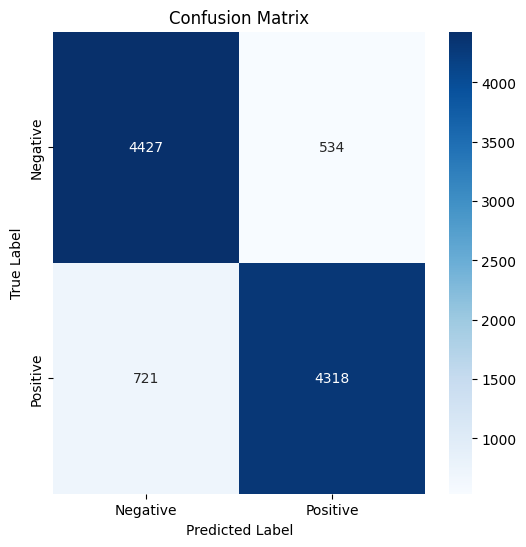

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predicting sentiment on test data
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



2. Classification Report

In [46]:
from sklearn.metrics import classification_report

# Generating classification report
report = classification_report(Y_test, Y_pred, target_names=["Negative", "Positive"])
print(report)

              precision    recall  f1-score   support

    Negative       0.86      0.89      0.88      4961
    Positive       0.89      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



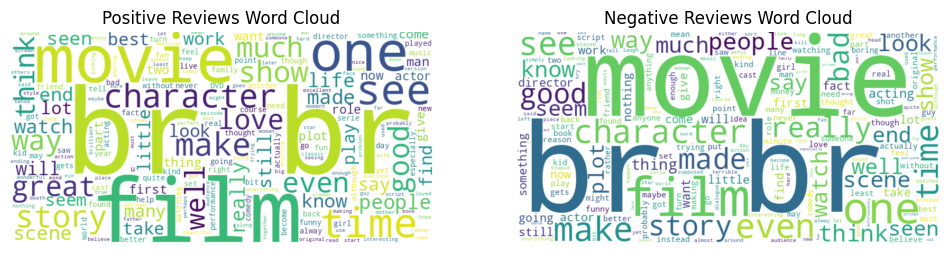

In [47]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = data[data["sentiment"] == 1]["review"].values
negative_reviews = data[data["sentiment"] == 0]["review"].values

# Wordcloud for Positive Reviews
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

# Create and plot word clouds
plt.figure(figsize=(12, 6))

# Positive Reviews Word Cloud
plt.subplot(1, 2, 1)
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title("Positive Reviews Word Cloud")
plt.axis("off")

# Negative Reviews Word Cloud
plt.subplot(1, 2, 2)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title("Negative Reviews Word Cloud")
plt.axis("off")

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step


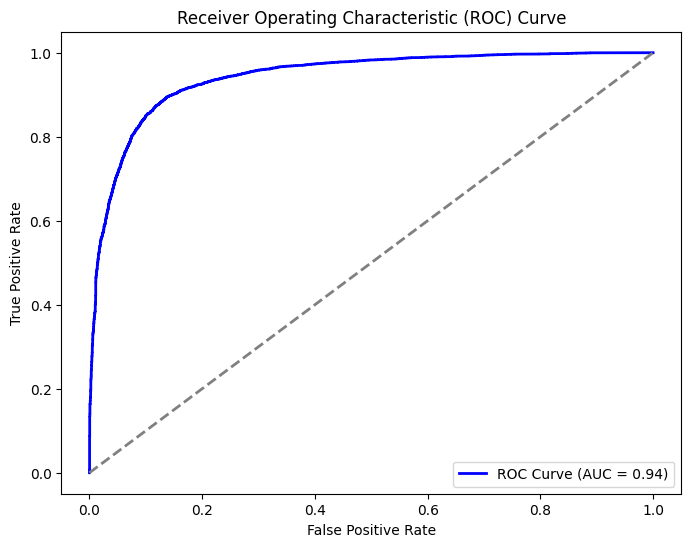

In [48]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


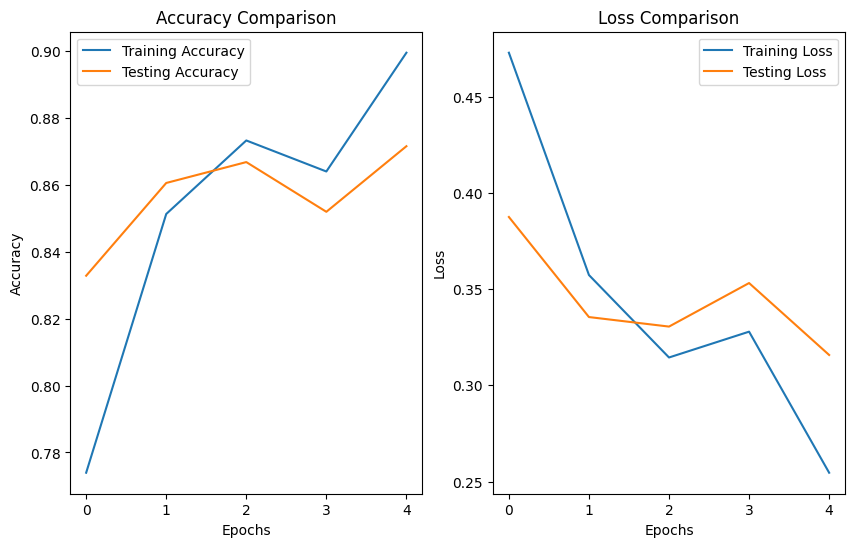

In [49]:
# Plot training vs testing accuracy/loss
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title("Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title("Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


<ipython-input-54-cd2f8f39c0e6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='word', data=tfidf_df.head(20), palette='Blues')


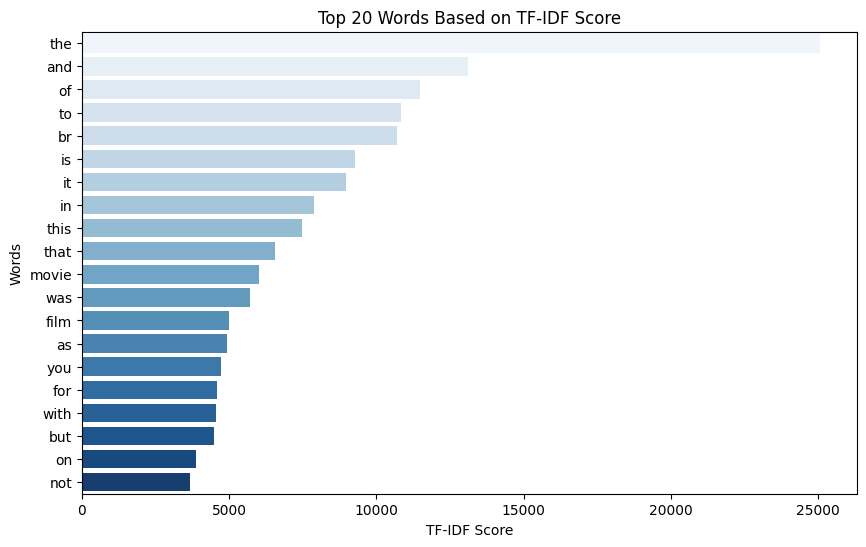

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the reviews using TF-IDF
vectorizer = TfidfVectorizer(max_features=20)
X_tfidf = vectorizer.fit_transform(data['review'])

# Get the top 20 words based on TF-IDF scores
words = vectorizer.get_feature_names_out()
scores = X_tfidf.sum(axis=0).A1

# Creating a DataFrame for easy plotting
tfidf_df = pd.DataFrame({'word': words, 'score': scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False)

# Plotting the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='word', data=tfidf_df.head(20), palette='Blues')
plt.title("Top 20 Words Based on TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.show()


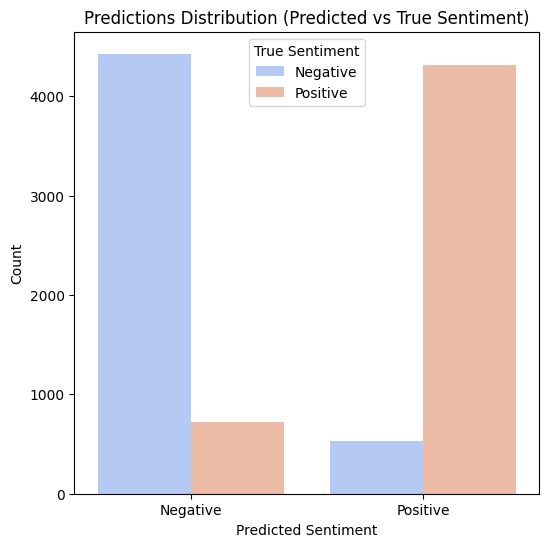

In [55]:
# Plotting the comparison between predicted and true sentiments
plt.figure(figsize=(6, 6))
sns.countplot(x=Y_pred.flatten(), hue=Y_test, palette='coolwarm')
plt.title("Predictions Distribution (Predicted vs True Sentiment)")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Count")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.legend(title="True Sentiment", labels=["Negative", "Positive"])
plt.show()
